Morrilyn Savice

Final project

Data Fitting and Optimization Using Gaussian and Polynomial Curves

In [1]:
using LsqFit, CairoMakie

# Load modules
include("CurveFitting.jl")
include("polynomial_fitting.jl")

using .CurveFitting 
using .PolynomialFitting

# x values and coefficients for the polynomial
x_poly = range(-3, 3, length=100)
coefficients = [1.0, -2.0, 3.0]  # Coefficients for the polynomial: y = 1 - 2x + 3x^2

# Generate noisy polynomial data 
x_poly_data, y_poly_data = PolynomialFitting.generate_polynomial_data(collect(x_poly), coefficients; noise_level=0.5)


([-3.0, -2.9393939393939394, -2.878787878787879, -2.8181818181818183, -2.757575757575758, -2.696969696969697, -2.6363636363636362, -2.5757575757575757, -2.515151515151515, -2.4545454545454546  …  2.4545454545454546, 2.515151515151515, 2.5757575757575757, 2.6363636363636362, 2.696969696969697, 2.757575757575758, 2.8181818181818183, 2.878787878787879, 2.9393939393939394, 3.0], [34.275315829956895, 33.35079200939119, 31.50900715849833, 30.134097084979818, 29.51428355384612, 28.611764513649835, 27.480878229228537, 26.442889880601665, 24.997509603038104, 23.282055710547823  …  13.233329960871771, 14.88962087697131, 15.769827365826064, 16.838556229987223, 17.52894549971241, 17.830263526030144, 18.988002556121675, 19.580158370412253, 21.03477475646838, 21.63531911506986])

In [3]:
# Gaussian Curve Fitting Example
("Gaussian Curve Fitting Example:/")
x = range(-5, 5, length=100)
x_data, y_data = generate_data(collect(x); a=2.0, μ=0.0, σ=1.5, noise_level=0.2)


([-5.0, -4.898989898989899, -4.797979797979798, -4.696969696969697, -4.595959595959596, -4.494949494949495, -4.393939393939394, -4.292929292929293, -4.191919191919192, -4.090909090909091  …  4.090909090909091, 4.191919191919192, 4.292929292929293, 4.393939393939394, 4.494949494949495, 4.595959595959596, 4.696969696969697, 4.797979797979798, 4.898989898989899, 5.0], [0.3525177157793548, 0.08611414019013396, -0.12318735299387173, 0.33648502853013185, -0.012108782595308454, -0.02404175778809094, 0.05592187871154741, -0.1386534722000561, -0.444587978261486, -0.1902908005673541  …  -0.022125757278442022, -0.12778239952734544, -0.357287259859642, -0.14212349354799564, 0.21759464820374735, -0.1381977979933377, -0.010225852596224955, -0.10517117637895271, 0.055445385589631135, 0.18832793055431538])

In [4]:
# Fit the Gaussian model
p0_gaussian = [1.0, 0.0, 1.0]  # Initial guess: a=1, μ=0, σ=1
fit_gaussian = fit_curve(collect(x), y_data, p0_gaussian)
("Fitted Gaussian Parameters: ", fit_gaussian.param)

("Fitted Gaussian Parameters: ", [2.045499603384557, 0.008389875363528587, 1.487470872235692])

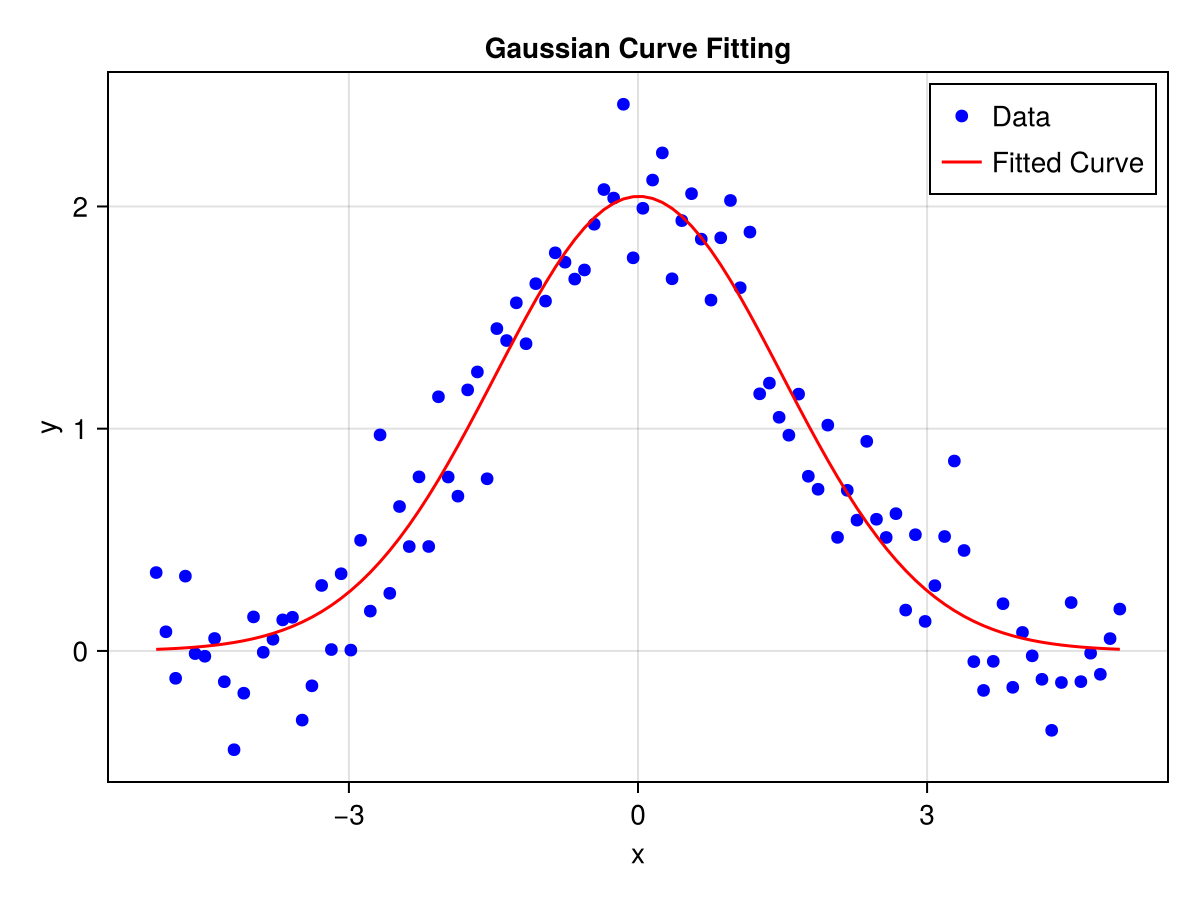

CairoMakie.Screen{IMAGE}


In [5]:
# Plot the Gaussian fit
CurveFitting.plot_fit(collect(x), y_data, fit_gaussian.param)

In [7]:
# Fit the Polynomial model
fit_poly = PolynomialFitting.fit_polynomial(collect(x_poly), y_poly_data, 2)  # Pass degree as positional argument

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Vector{LsqFit.LMState{LsqFit.LevenbergMarquardt}}}([1.0774301497768426, -2.0450076326362434, 2.992004977046759], [-0.134817988850493, -0.4112459173723195, 0.2515670189751411, 0.4694850124903702, -0.04571370183708723, -0.2562270725598381, -0.21639336451544722, -0.247477757723356, 0.15080961254754754, 0.8411504322873  …  0.8507478035672484, -0.028309752828578283, -0.10930304743749275, -0.3568388828106883, -0.20405528920578675, 0.3597793823486981, 0.08917288467150186, 0.40612943733739115, -0.1173947472201533, 0.2351329302190841], [1.0000000000274187 -3.0000000000192077 9.000000000080048; 0.9999999994828854 -2.9393939393084345 8.640036731167159; … ; 1.0000000000274187 2.9393939394518807 8.64003673097107; 0.9999999997551521 3.0000000000192077 9.000000000080048], true, Iter     Function value   Gradient norm 
------   --------------   --------------
, Float64[])

In [8]:
# Display fitted parameters
("Fitted Polynomial Parameters: ", fit_poly.param)

("Fitted Polynomial Parameters: ", [1.0774301497768426, -2.0450076326362434, 2.992004977046759])

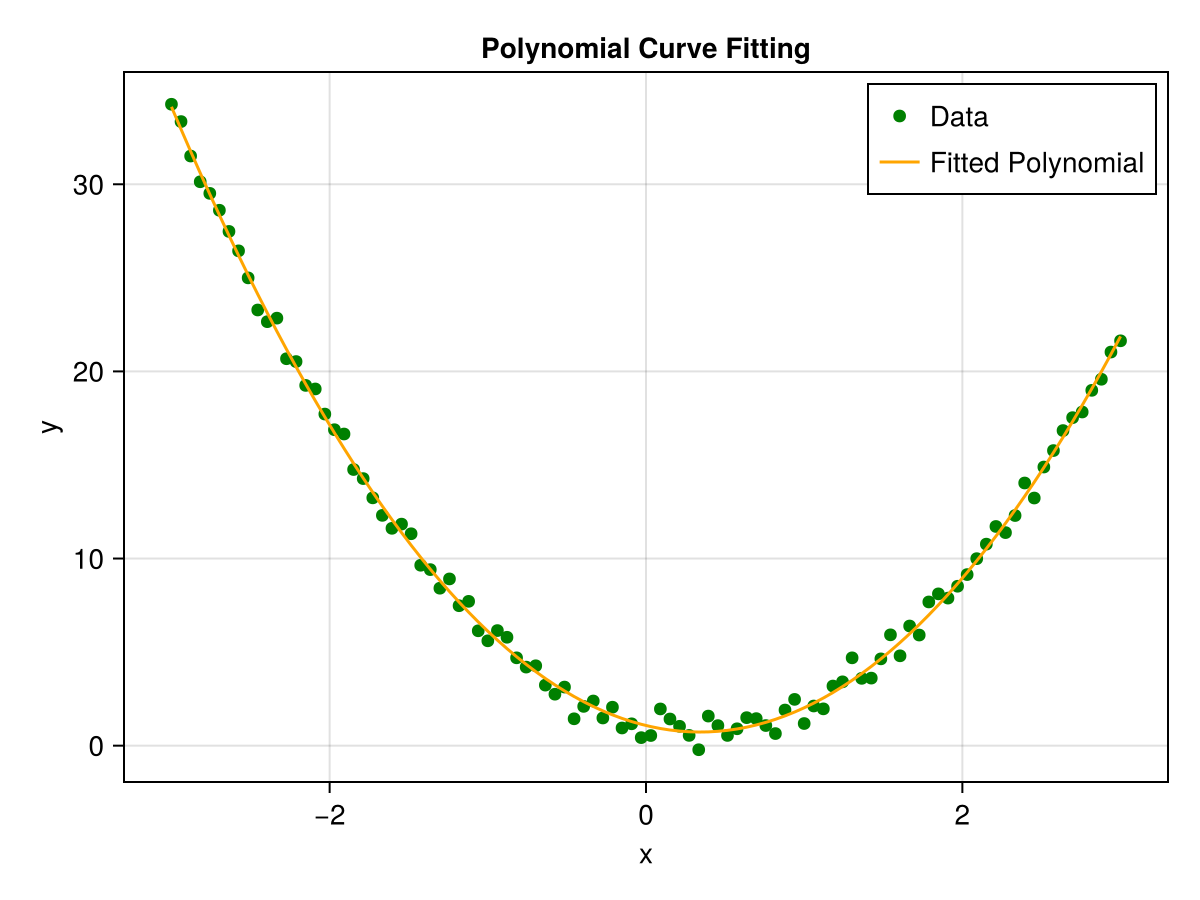

CairoMakie.Screen{IMAGE}


In [9]:
# Plot the Polynomial fit
PolynomialFitting.plot_polynomial(collect(x_poly), y_poly_data, fit_poly.param)


In [10]:
using BenchmarkTools

# Benchmark Gaussian Curve Fitting
@btime CurveFitting.fit_curve($collect(x), $y_data, $p0_gaussian)


  91.259 μs (542 allocations: 281.80 KiB)


LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Vector{LsqFit.LMState{LsqFit.LevenbergMarquardt}}}([2.045499603384557, 0.008389875363528587, 1.487470872235692], [-0.34545462983333364, -0.07725700282702061, 0.13424313747971026, -0.32274830861047965, 0.029098017357816794, 0.04495695128327918, -0.030291958691086186, 0.16991641889496278, 0.48254655011930114, 0.23616696634896184  …  0.06944752880246166, 0.1669670911803258, 0.3895847792667882, 0.16862186581804803, -0.1959541865467742, 0.15578963289743641, 0.02446070783168583, 0.116636656986193, -0.04625298867407695, -0.18099187574144224], [0.003452988177316743 -0.015988056697365253 0.05383259786474806; 0.00433006066012122 -0.019644732008069505 0.0648107887969009; … ; 0.004493961719915067 0.020318609032464748 0.06680479711376565; 0.0035864366825814754 0.016550315776565 0.055539053125530306], true, Iter     Function value   Gradient norm 
------   --------------   --------------
, Float64[])

In [11]:
# Benchmark Polynomial Curve Fitting
@btime PolynomialFitting.fit_polynomial($collect(x_poly), $y_poly_data, 2)

  106.792 μs (487 allocations: 365.09 KiB)


LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Vector{LsqFit.LMState{LsqFit.LevenbergMarquardt}}}([1.0774301497768426, -2.0450076326362434, 2.992004977046759], [-0.134817988850493, -0.4112459173723195, 0.2515670189751411, 0.4694850124903702, -0.04571370183708723, -0.2562270725598381, -0.21639336451544722, -0.247477757723356, 0.15080961254754754, 0.8411504322873  …  0.8507478035672484, -0.028309752828578283, -0.10930304743749275, -0.3568388828106883, -0.20405528920578675, 0.3597793823486981, 0.08917288467150186, 0.40612943733739115, -0.1173947472201533, 0.2351329302190841], [1.0000000000274187 -3.0000000000192077 9.000000000080048; 0.9999999994828854 -2.9393939393084345 8.640036731167159; … ; 1.0000000000274187 2.9393939394518807 8.64003673097107; 0.9999999997551521 3.0000000000192077 9.000000000080048], true, Iter     Function value   Gradient norm 
------   --------------   --------------
, Float64[])